In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\netflix_titles.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


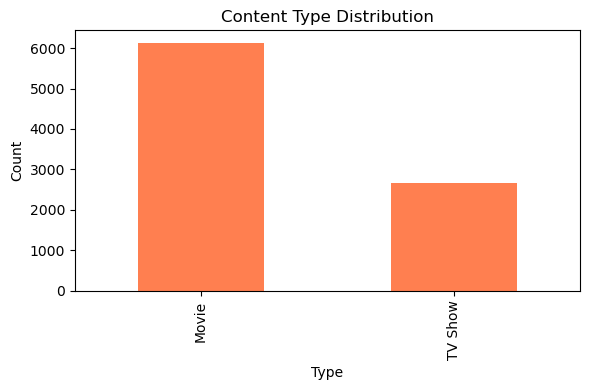

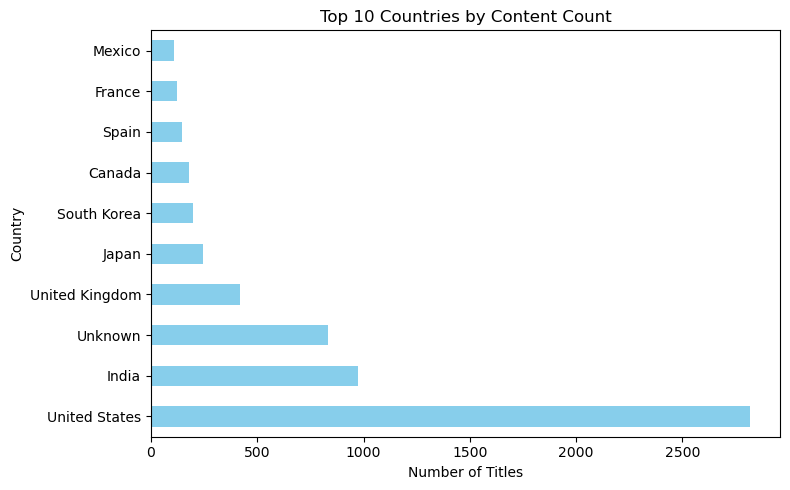

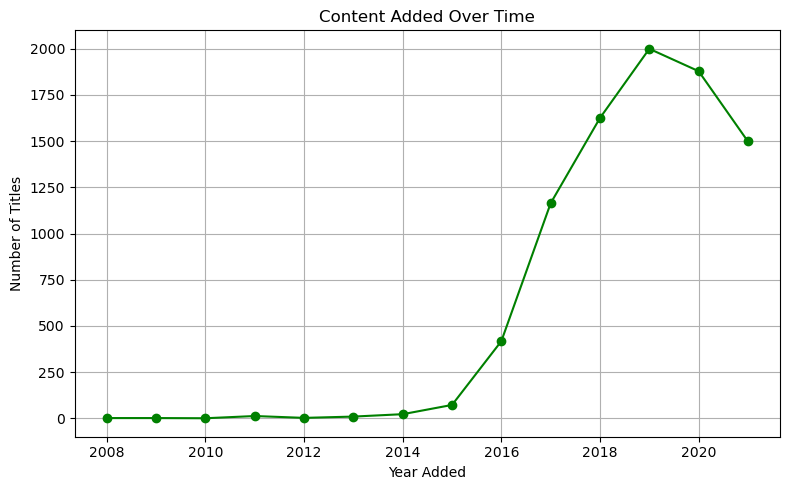

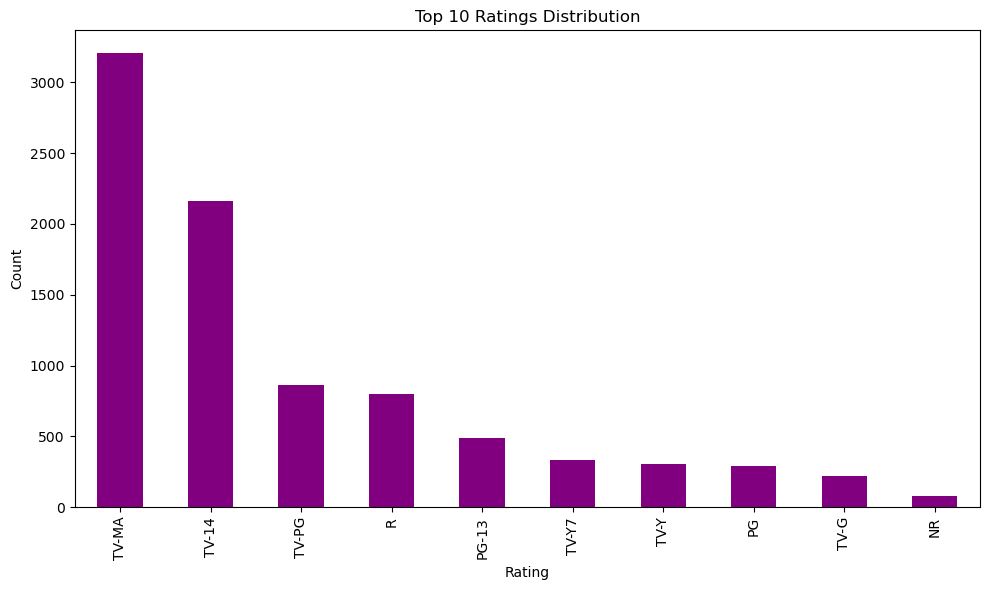

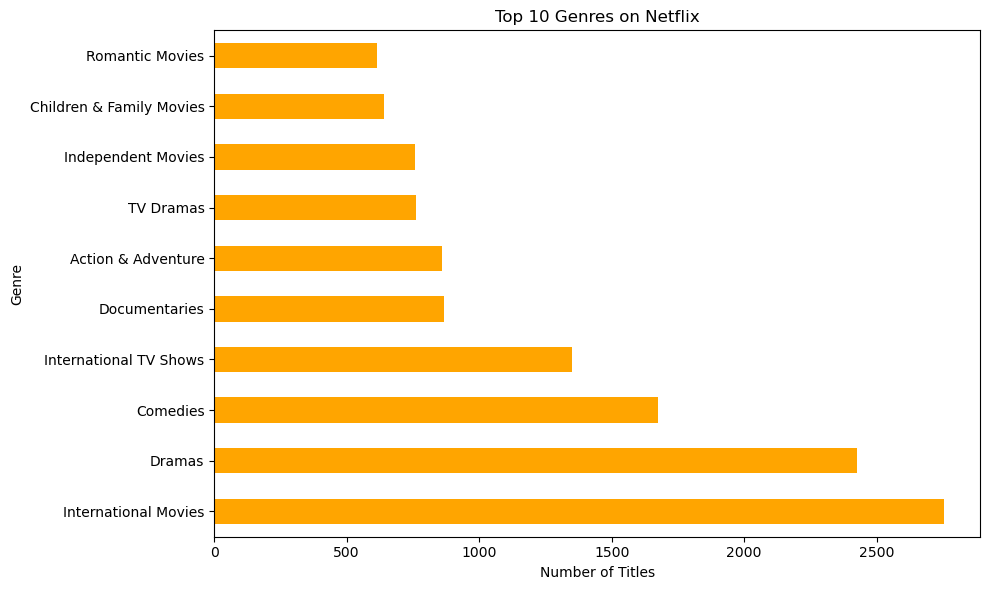

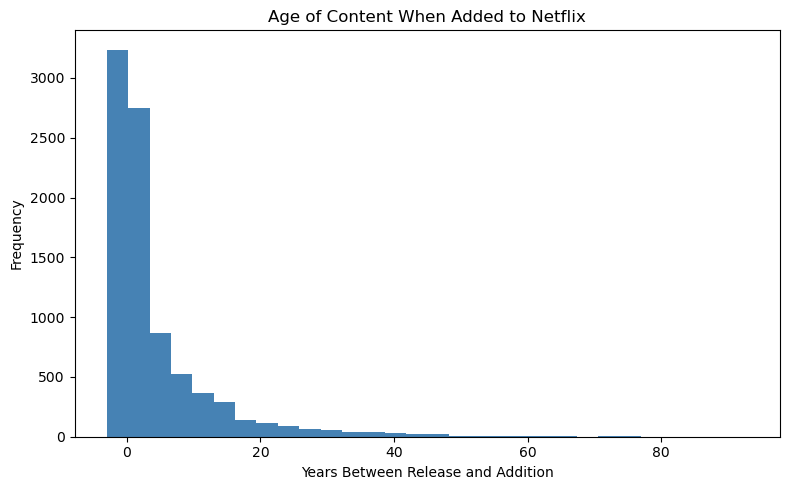

In [4]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\netflix_titles.csv")

# Clean missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create new features
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['content_age'] = df['year_added'] - df['release_year']
df['genre_list'] = df['listed_in'].str.split(', ')

# Visualization 1: Content type distribution
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color='coral')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualization 2: Top 10 countries by content count
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Visualization 3: Content added over years
plt.figure(figsize=(8,5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 4: Rating distribution
plt.figure(figsize=(10,6))
df['rating'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualization 5: Genre frequency
genre_exploded = df.explode('genre_list')
top_genres = genre_exploded['genre_list'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='barh', color='orange')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Visualization 6: Content age distribution
plt.figure(figsize=(8,5))
df['content_age'].dropna().plot(kind='hist', bins=30, color='steelblue')
plt.title('Age of Content When Added to Netflix')
plt.xlabel('Years Between Release and Addition')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

